# Google Play Store Apps Data
### Exploratory Data Analysis

## 1. Contents
https://www.kaggle.com/lava18/google-play-store-apps

## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import rcParams

## 3. Objectives 


## 4. Load Google Play Store Apps Data

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.shape

(10841, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Except for the "Rating" (float64) all the columns are object.

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## 5. Explore the Data

### 5-1. Number of Missing Values by Column

In [5]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


Rating, Current Ver, Android Ver, Type and Content Rating have some missing values. Rating has the most missing value, at around 13.6%.

In [6]:
data.shape

(10841, 13)

### 5-2. "App" 

In [7]:
data['App'].describe()

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

In [8]:
# Unique "App" names
data['App'].value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
8 Ball Pool                                           7
Candy Crush Saga                                      7
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Bowmasters                                            6
Nick                                                  6
Bubble Shooter                                        6
Temple Run 2                                          6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Subway Surfers                                        6
slither.io                                            6
Helix Jump                                            6
MeetMe: Chat & Meet New People                        5
theScore: Live Sports Scores, News, Stats & Vide

There are multiple entries of the apps of the same names.

- What should be done to fix this?

In [9]:
# Set Index
data.set_index("App", inplace=True)
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### 5-3. Category

In [10]:
data['Category'].describe()

count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

In [11]:
# Unique "Cateogry"
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [12]:
print(len(data['Category'].unique()) , "categories")

34 categories


There is one category called "1.9" which looks like a mistake. 

In [13]:
data[data['Category']=='1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


It seems that the info has not been properly entered into correct columns. So I decided to drop this row. 


In [14]:
# drop incorrect row
data.drop(data.index[data['Category'] == '1.9'], inplace = True)
data[data['Category']=='1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,


##### Bar Plot: Distribution of Different Categories

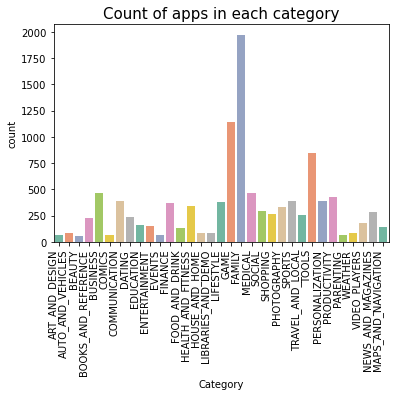

In [15]:
gc = sns.countplot(x="Category",data=data, palette = "Set2");
gc.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gc
plt.title('Count of apps in each category',size = 15);

Category "Family" has the highest counts of apps, followed by "Games" and "Personalization."

### 5-4. Genres

In [16]:
data['Genres'].describe()

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [17]:
# Unique "Genres"
data['Genres'].value_counts()

Tools                       842
Entertainment               623
Education                   549
Medical                     463
Business                    460
                           ... 
Strategy;Creativity           1
Communication;Creativity      1
Strategy;Education            1
Lifestyle;Pretend Play        1
Parenting;Brain Games         1
Name: Genres, Length: 119, dtype: int64

In [18]:
print( len(data['Genres'].unique()) , "genres")

119 genres


##### Bar Plot: Distribution of Different Genres

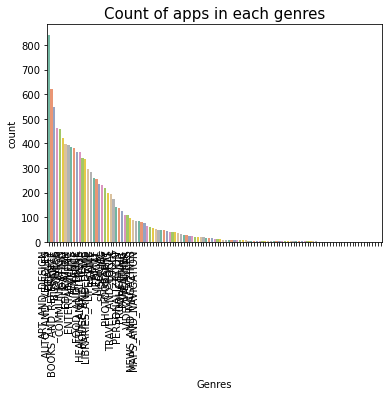

In [19]:
gg = sns.countplot(x="Genres",data=data, palette = "Set2",order=data['Genres'].value_counts().index);
gg.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gg
plt.title('Count of apps in each genres',size = 15);

We can see that there is skewed distribution for "Genres," which can be a potential cause for a bias. Therefore, decided to get rid of the sub genres (that starts after ";") and just use the bigger genres.

In [20]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [21]:
print( len(data['Genres'].unique()) , "genres")
print("\n", data['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


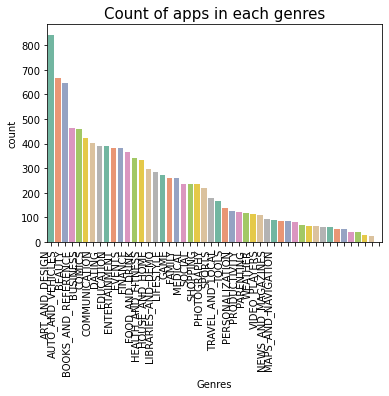

In [22]:
gg = sns.countplot(x="Genres",data=data, palette = "Set2",order=data['Genres'].value_counts().index);
gg.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gg
plt.title('Count of apps in each genres',size = 15);

Some of the Categories and Genres have overlap in values. 

### Genres and Category

In [23]:
(data[data.Category != data.Genres]
 .groupby('Category')['Genres']
 .value_counts())

Category             Genres                 
ART_AND_DESIGN       Art & Design                65
AUTO_AND_VEHICLES    Auto & Vehicles             85
BEAUTY               Beauty                      53
BOOKS_AND_REFERENCE  Books & Reference          231
BUSINESS             Business                   460
                                               ... 
SPORTS               Sports                     384
TOOLS                Tools                      843
TRAVEL_AND_LOCAL     Travel & Local             258
VIDEO_PLAYERS        Video Players & Editors    175
WEATHER              Weather                     82
Name: Genres, Length: 71, dtype: int64

In [24]:
data[['Category', 'Genres']].nunique()

Category    33
Genres      48
dtype: int64

In [25]:
data[data.Category != data.Genres]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up


### 5-5. Rating

In [26]:
data['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [27]:
# Unique "Rating"
data['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

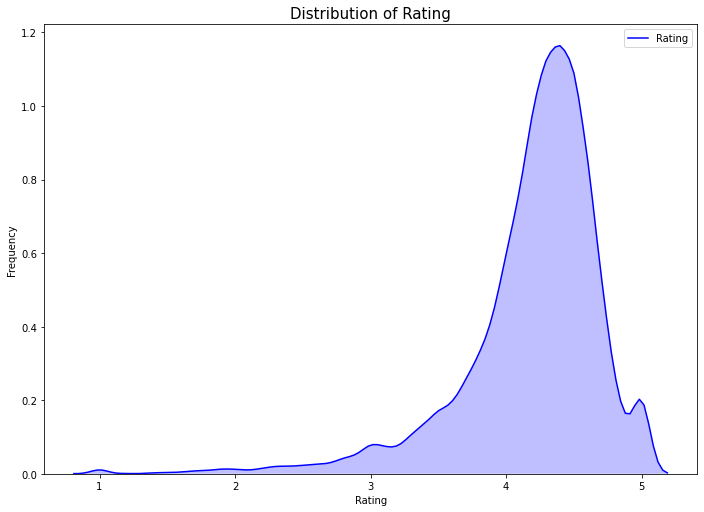

In [28]:
rcParams['figure.figsize'] = 11.7,8.27;
gr = sns.kdeplot(data.Rating, color="blue", shade = True);
gr.set_xlabel("Rating");
gr.set_ylabel("Frequency");
plt.title('Distribution of Rating',size = 15);

In [29]:
data.Rating.mean()

4.191757420456978

Rating had 13.6% of its data missing. 

### 5-6. Content Rating

In [30]:
data['Content Rating'].describe()

count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dtype: object

In [31]:
# Unique "Content Rating"
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### Barplot: Content Rating

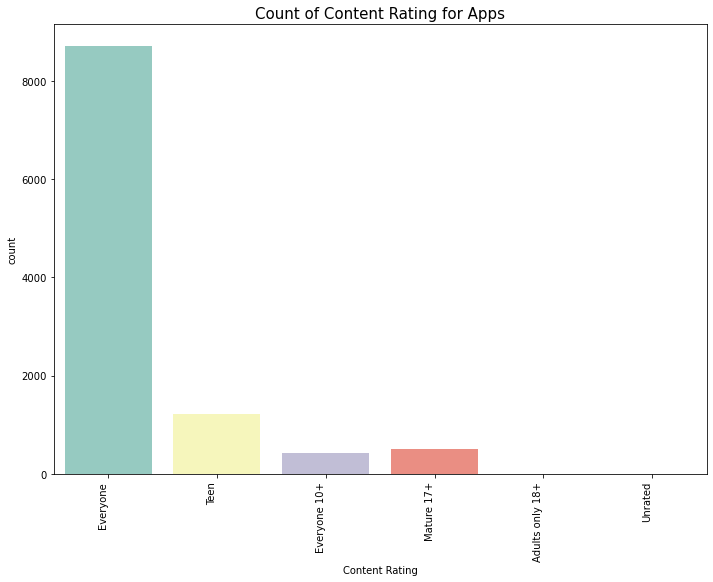

In [32]:
gcr = sns.countplot(x="Content Rating",data=data, palette = "Set3");
gcr.set_xticklabels(gcr.get_xticklabels(), rotation=90, ha="right");
gcr
plt.title('Count of Content Rating for Apps',size = 15);

There are 2 entries of "Unrated," and 3 entries of "Adults only 18+."

In [33]:
data[data['Content Rating']=='Unrated']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,24-Jun-15,5.2,3.0 and up
DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,27-Feb-12,1.3,2.3.3 and up


In [34]:
data[data['Content Rating']=='Adults only 18+']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,"500,000+",Free,0,Adults only 18+,Comics,4-Jul-18,1.1.7.0,4.1 and up
DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+,Sports,24-Jul-18,3.21.324,4.4 and up
Manga Books,COMICS,3.8,7326,Varies with device,"500,000+",Free,0,Adults only 18+,Comics,3-Aug-18,Varies with device,Varies with device


Are there any relationship between "Rating" and "Content Rating"?

#### Boxplot of Rating and Content Rating

Text(0.5, 1.0, 'Box plot Rating vs. Content Rating')

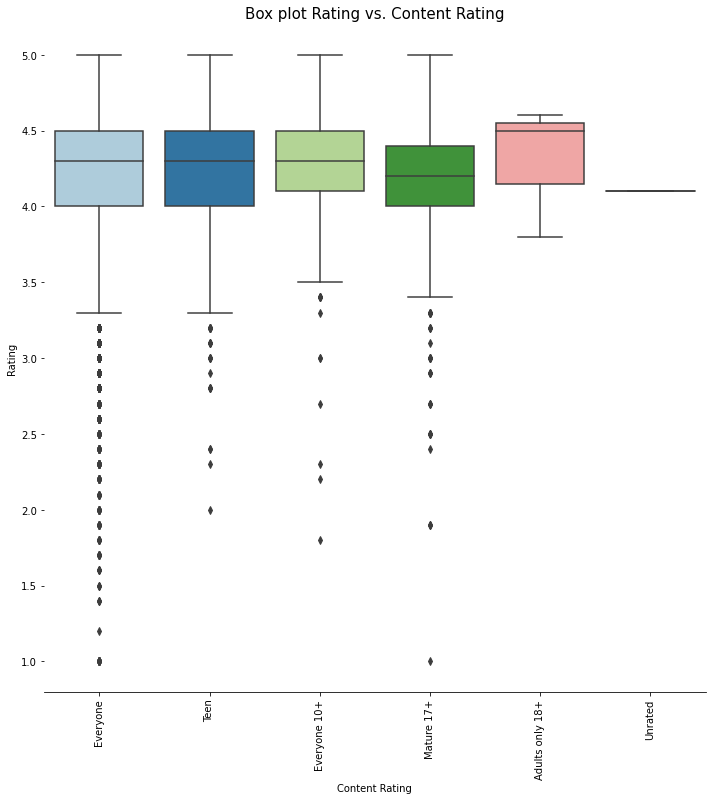

In [35]:
grcr = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
grcr.despine(left=True)
grcr.set_xticklabels(rotation=90)
grcr = grcr.set_ylabels("Rating")
plt.title('Box plot Rating vs. Content Rating',size = 15)

There was no noticeable pattern in rating in terms of content rating.

### 5-7. Reviews

In [36]:
data['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [37]:
# Convert "Reviews" into integers
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
data['Reviews'].head()

App
Photo Editor & Candy Camera & Grid & ScrapBook           159
Coloring book moana                                      967
U Launcher Lite – FREE Live Cool Themes, Hide Apps     87510
Sketch - Draw & Paint                                 215644
Pixel Draw - Number Art Coloring Book                    967
Name: Reviews, dtype: int64

In [38]:
# Unique "Reviews"
data['Reviews'].value_counts()

0          596
1          272
2          214
3          175
4          137
          ... 
155693       1
12443        1
163997       1
37023        1
1385093      1
Name: Reviews, Length: 6001, dtype: int64

#### Distribution of Number of Reviews

Text(0.5, 1.0, 'Distribution of Reveiw')

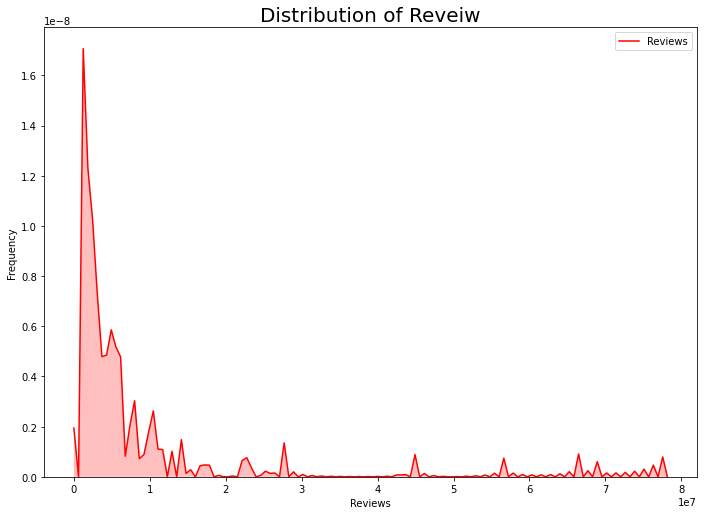

In [39]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Reviews, color="Red", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

### 5-8. Size

In [40]:
data['Size'].describe()

count                  10840
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [41]:
# Unique "Size"
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Can see that there are values with different measurement (i.e. ks and Ms) and some values "Varies with device."

In [42]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
779k                     1
801k                     1
980k                     1
108k                     1
97k                      1
Name: Size, Length: 461, dtype: int64

In [43]:
data[data['Size']== 'Varies with device']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,24-Jul-18,Varies with device,Varies with device
Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,27-Sep-17,Varies with device,4.4 and up
Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,23-May-18,Varies with device,Varies with device


In [44]:
# Removing "M"s and replace "k" by dividing it by 1000 -  cpmvert it to Ms
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: float(x))

In [45]:
data['Size'].value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
         ... 
0.027       1
0.642       1
0.647       1
0.039       1
0.942       1
Name: Size, Length: 459, dtype: int64

In [46]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design,20-Jun-18,1.1,4.4 and up


### 5-9. Installs

In [47]:
data['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [48]:
# Unique "Installs"
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [49]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [50]:
# Remove "+"s
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

Note that 0+ is merged with 0s.

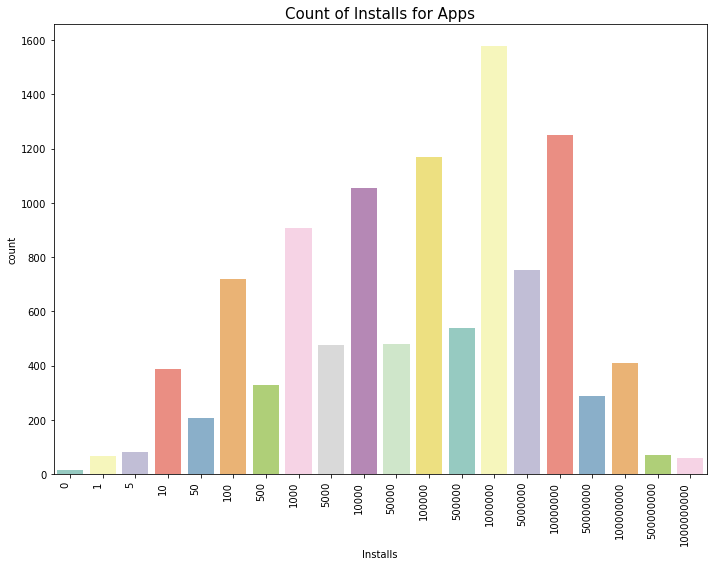

In [51]:
gi = sns.countplot(x="Installs",data=data, palette = "Set3");
gi .set_xticklabels(gi.get_xticklabels(), rotation=90, ha="right");
gi
plt.title('Count of Installs for Apps',size = 15);

### 5-10. Type

In [52]:
data['Type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [53]:
# Unique "Type"
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [54]:
data['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

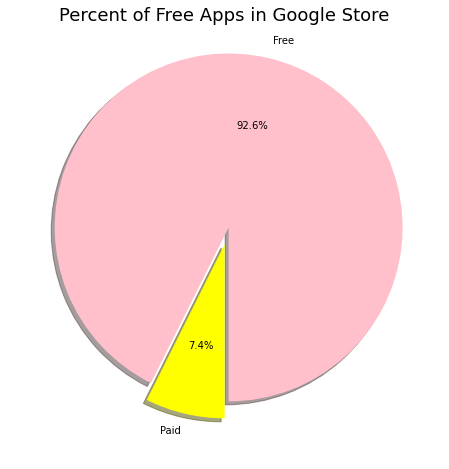

In [55]:
# Plot pie chart
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["pink","yellow"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free Apps in Google Store',size = 18)
plt.show()

In [56]:
# 0 - Free, 1 - Paid
# df['Type'] = pd.factorize(df['Type'])[0]
#print(df.dtypes)

### 5-11. Price

In [57]:
data['Price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: Price, dtype: object

In [58]:
# Unique "Price"
data['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [59]:
# Remove the dollar sign and make the variable float
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [60]:
data['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

Max for price is $400!

In [61]:
data['Price'].value_counts()

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

### 5-12. Last Updated

In [62]:
data['Last Updated'].describe()

count        10840
unique        1377
top       3-Aug-18
freq           326
Name: Last Updated, dtype: object

In [63]:
# Unique "Installs"
data['Last Updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [64]:
data['Last Updated'].value_counts()

3-Aug-18     326
2-Aug-18     304
31-Jul-18    294
1-Aug-18     285
30-Jul-18    211
            ... 
7-Oct-15       1
31-Mar-15      1
21-Mar-16      1
27-Feb-15      1
15-Jan-14      1
Name: Last Updated, Length: 1377, dtype: int64

In [65]:
#Convert to datetime object
data['last_updated_dt'] = pd.to_datetime(data['Last Updated'])
data['last_updated_dt'].describe()

count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: last_updated_dt, dtype: object

In [66]:
data['last_updated_dt'].max() 

Timestamp('2018-08-08 00:00:00')

### 5-13. Current Ver

In [67]:
data['Current Ver'].describe()

count                  10832
unique                  2783
top       Varies with device
freq                    1459
Name: Current Ver, dtype: object

In [68]:
# Unique "Current Ver"
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

### 5-14. Android Ver

In [69]:
data['Android Ver'].describe()

count          10838
unique            33
top       4.1 and up
freq            2451
Name: Android Ver, dtype: object

In [70]:
# Unique "Android Ver"
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Potential Questions:

## Rating vs. Review
Apps with more reviews tend to have better rating

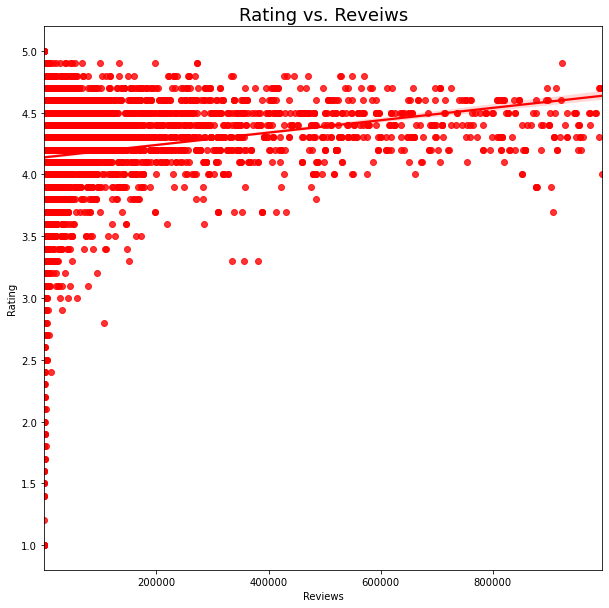

In [71]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'red',data=data[data['Reviews']<1000000]);
plt.title('Rating vs. Reveiws',size = 18);

## Rating vs. Price
Expensive apps tend to have lower rating

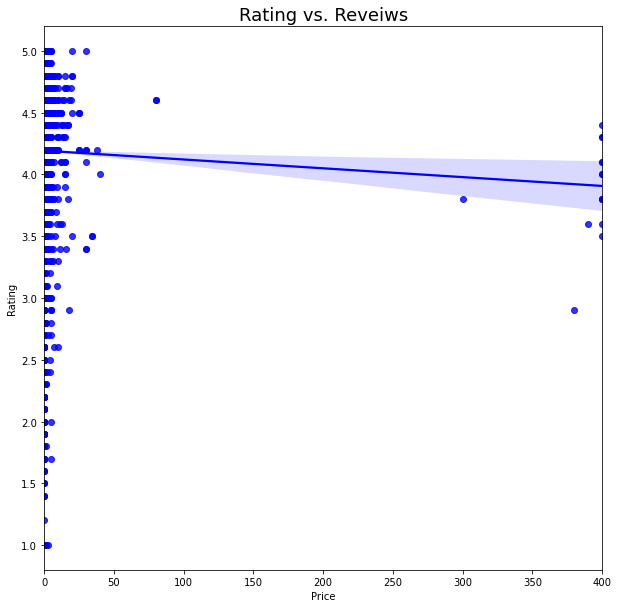

In [72]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'blue',data=data[data['Price']<1000000]);
plt.title('Rating vs. Reveiws',size = 18);

## Rating vs. Installs
Apps with larger number of installs have greater rating

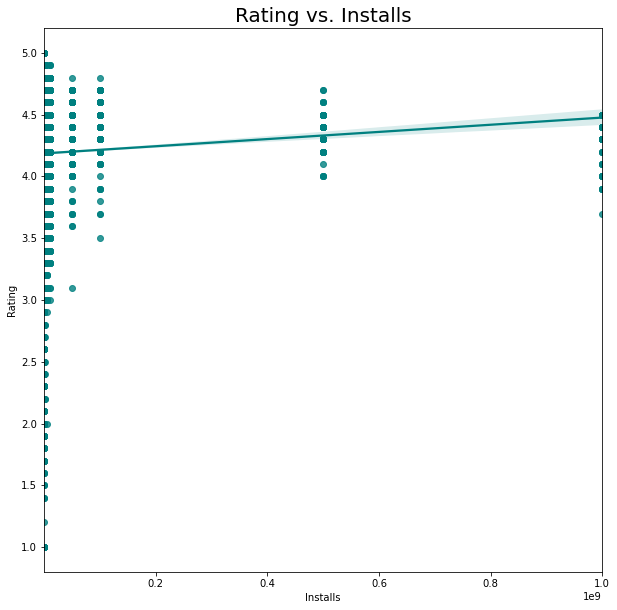

In [73]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating vs. Installs',size = 20);

## Rating vs. Last Updated

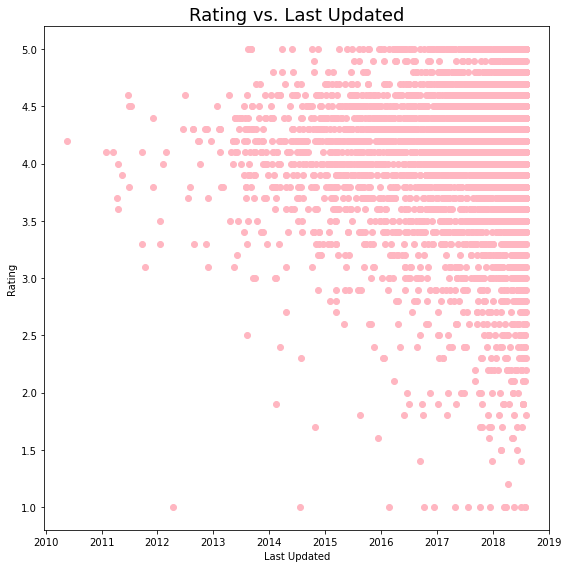

In [74]:
plt.plot_date(data["last_updated_dt"],data["Rating"],color = 'lightpink')
plt.title('Rating vs. Last Updated',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Rating');
plt.tight_layout();
plt.show();

## Last Updated vs. Reviews

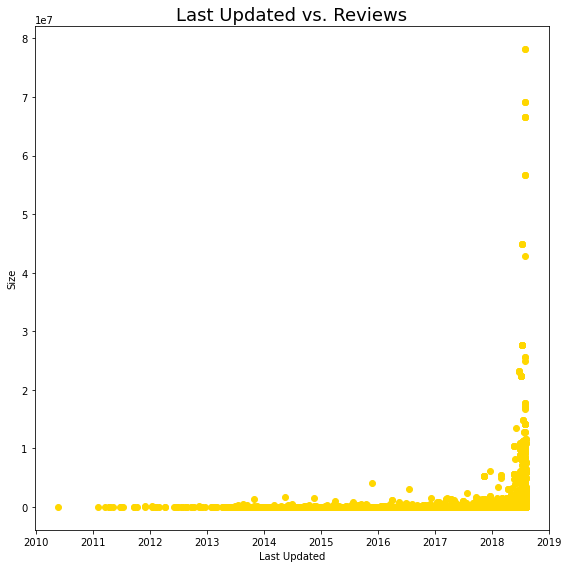

In [75]:
plt.plot_date(data["last_updated_dt"],data["Reviews"],color = 'gold')
plt.title('Last Updated vs. Reviews',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Size');
plt.tight_layout();
plt.show();

## Last Updated vs. Price

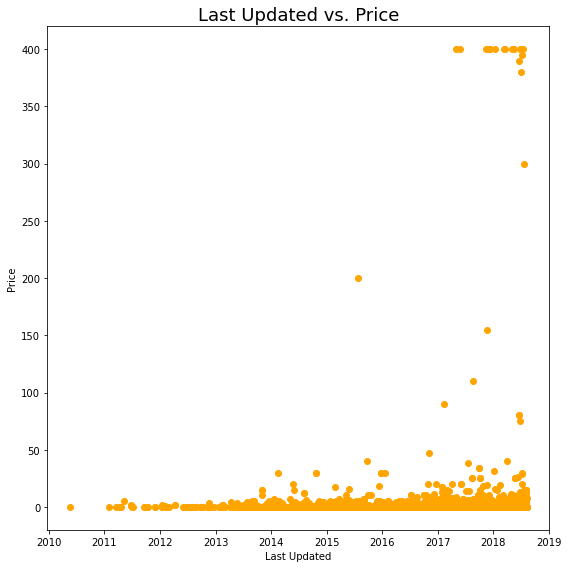

In [76]:
plt.plot_date(data["last_updated_dt"],data["Price"],color = 'orange')
plt.title('Last Updated vs. Price',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Price');
plt.tight_layout();
plt.show();

## Last Updated vs. Installs

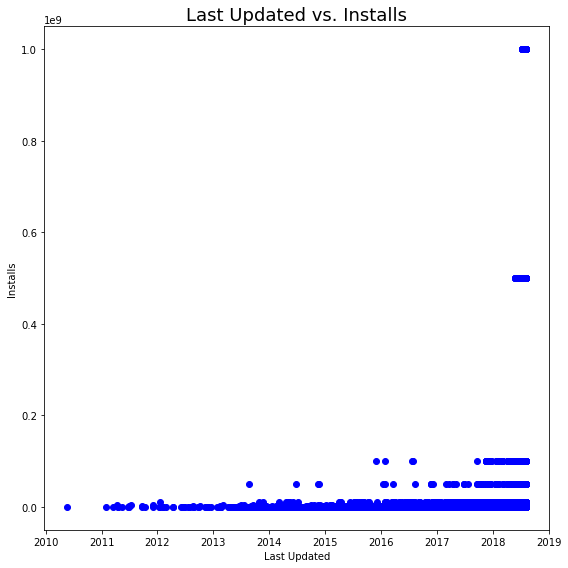

In [77]:
plt.plot_date(data["last_updated_dt"],data["Installs"],color = 'blue')
plt.title('Last Updated vs. Installs',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Installs');
plt.tight_layout();
plt.show();

## Last Updated vs. Size

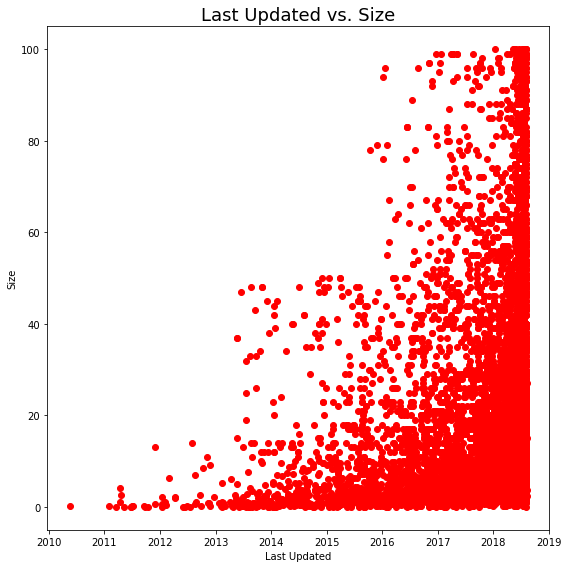

In [78]:
plt.plot_date(data["last_updated_dt"],data["Size"],color = 'red')
plt.title('Last Updated vs. Size',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Size');
plt.tight_layout();
plt.show();

## 6. Preprocessing and Training

#### - Given all these variables, can we predict when someone updates for the last time?
#### - Given the state of the applciations, can we predict what the rating of the applications would be? 

In [79]:
from sklearn import __version__ as sklearn_version
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [80]:
# Sort by "Category"
data.sort_values("Category", inplace = True)

## 6-1) Data Cleaning

In [81]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


Since I will be using the Rating, Content Rating, Category, Reviews, Size, Installs, and Price for the Random Forest Regressor, I will impute the missing values with the means for the Rating and Size, and drop the missing row for Content Rating.

#### Rating - impute with mean

In [82]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
data['rating_mean'] = imputer.fit_transform(data[['Rating']])

#### Rating - impute with median

In [83]:
# Replace "NaN" with median 
imputer = SimpleImputer()
data['rating_median'] = imputer.fit_transform(data[['Rating']])

In [84]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


#### Size - Impute with mean

In [85]:
# Replace "NaN" with mean 
data['size_mean'] = imputer.fit_transform(data[['Size']])

#### Size - impute with median

In [86]:
# Replace "NaN" with median
data['size_median'] = imputer.fit_transform(data[['Size']])

In [87]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


#### Drop missing values

In [88]:
data.shape

(10840, 17)

In [89]:
data['content_rating_c'] = data['Content Rating']
data.dropna(subset=['content_rating_c'], inplace=True)

In [90]:
data.shape

(10840, 18)

In [91]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


### Convert all the variables into numerical format

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Category          10840 non-null  object        
 1   Rating            9366 non-null   float64       
 2   Reviews           10840 non-null  int64         
 3   Size              9145 non-null   float64       
 4   Installs          10840 non-null  int64         
 5   Type              10839 non-null  object        
 6   Price             10840 non-null  float64       
 7   Content Rating    10840 non-null  object        
 8   Genres            10840 non-null  object        
 9   Last Updated      10840 non-null  object        
 10  Current Ver       10832 non-null  object        
 11  Android Ver       10838 non-null  object        
 12  last_updated_dt   10840 non-null  datetime64[ns]
 13  rating_mean    

Category and Content Rating are strings

##### Cateogry

In [93]:
lb_make = LabelEncoder()

In [94]:
# Create column for "numeric" Category
data["category_num"] = lb_make.fit_transform(data["Category"])

In [95]:
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in data["Category"].unique():
 dict_category[i] = val
 val += 1

In [96]:
dict_category

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FAMILY': 11,
 'FINANCE': 12,
 'FOOD_AND_DRINK': 13,
 'GAME': 14,
 'HEALTH_AND_FITNESS': 15,
 'HOUSE_AND_HOME': 16,
 'LIBRARIES_AND_DEMO': 17,
 'LIFESTYLE': 18,
 'MAPS_AND_NAVIGATION': 19,
 'MEDICAL': 20,
 'NEWS_AND_MAGAZINES': 21,
 'PARENTING': 22,
 'PERSONALIZATION': 23,
 'PHOTOGRAPHY': 24,
 'PRODUCTIVITY': 25,
 'SHOPPING': 26,
 'SOCIAL': 27,
 'SPORTS': 28,
 'TOOLS': 29,
 'TRAVEL_AND_LOCAL': 30,
 'VIDEO_PLAYERS': 31,
 'WEATHER': 32}

##### Genre

In [97]:
# Create column for "numeric" Category
data["genres_num"] = lb_make.fit_transform(data["Genres"])

In [98]:
# Form dicitonary for Genres and numeric values
dict_genres = {}
val = 0
for i in data["Genres"].unique():
 dict_genres[i] = val
 val += 1

In [99]:
dict_genres

{'Art & Design': 0,
 'Auto & Vehicles': 1,
 'Beauty': 2,
 'Books & Reference': 3,
 'Business': 4,
 'Comics': 5,
 'Communication': 6,
 'Dating': 7,
 'Education': 8,
 'Entertainment': 9,
 'Events': 10,
 'Casual': 11,
 'Simulation': 12,
 'Puzzle': 13,
 'Role Playing': 14,
 'Strategy': 15,
 'Educational': 16,
 'Adventure': 17,
 'Health & Fitness': 18,
 'Lifestyle': 19,
 'Arcade': 20,
 'Action': 21,
 'Racing': 22,
 'Video Players & Editors': 23,
 'Sports': 24,
 'Trivia': 25,
 'Card': 26,
 'Board': 27,
 'Music & Audio': 28,
 'Music': 29,
 'Finance': 30,
 'Food & Drink': 31,
 'Word': 32,
 'Casino': 33,
 'House & Home': 34,
 'Libraries & Demo': 35,
 'Maps & Navigation': 36,
 'Medical': 37,
 'News & Magazines': 38,
 'Parenting': 39,
 'Personalization': 40,
 'Photography': 41,
 'Productivity': 42,
 'Shopping': 43,
 'Social': 44,
 'Tools': 45,
 'Travel & Local': 46,
 'Weather': 47}

##### Type

In [100]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

data['type_num'] = data['Type'].map(type_cat)

In [101]:
data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Android Ver,last_updated_dt,rating_mean,rating_median,size_mean,size_median,content_rating_c,category_num,genres_num,type_num
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.00,Everyone,Art & Design,7-Jan-18,...,4.0.3 and up,2018-01-07,4.1,4.1,19.00000,19.00000,Everyone,0,3,0
How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2,100000,Free,0.00,Everyone,Art & Design,11-Jul-18,...,4.1 and up,2018-07-11,3.8,3.8,9.20000,9.20000,Everyone,0,3,0
UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.00,Everyone,Art & Design,2-Aug-18,...,4.4 and up,2018-08-02,4.7,4.7,24.00000,24.00000,Everyone,0,3,0
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0.00,Everyone,Art & Design,14-Jul-18,...,2.3.3 and up,2018-07-14,4.1,4.1,21.51653,21.51653,Everyone,0,3,0
PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11.0,10000,Free,0.00,Everyone,Art & Design,29-Nov-17,...,4.0.3 and up,2017-11-29,4.7,4.7,11.00000,11.00000,Everyone,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wetter.com - Weather and Radar,WEATHER,4.2,189310,38.0,10000000,Free,0.00,Everyone,Weather,6-Aug-18,...,Varies with device,2018-08-06,4.2,4.2,38.00000,38.00000,Everyone,32,46,0
Yahoo Weather,WEATHER,4.4,1312037,NaN,10000000,Free,0.00,Everyone,Weather,1-Aug-18,...,Varies with device,2018-08-01,4.4,4.4,21.51653,21.51653,Everyone,32,46,0
Klara weather,WEATHER,4.6,36900,4.8,500000,Free,0.00,Everyone,Weather,28-Jul-18,...,4.0 and up,2018-07-28,4.6,4.6,4.80000,4.80000,Everyone,32,46,0


##### Content Rating

In [102]:
# Create column for "numeric" Content Rating 
data["content_rating_num"] = lb_make.fit_transform(data["Content Rating"])

In [103]:
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}

In [104]:
dict_content_rating

{'Adults only 18+': 0,
 'Everyone': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Teen': 4}

##### Make sure that other variables are all numeric as well

In [105]:
# Change datatype
data['reviews_num'] = pd.to_numeric(data['Reviews'])
data['installs_num'] = pd.to_numeric(data['Installs'])
data['price_num'] = pd.to_numeric(data['Price'])

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Category            10840 non-null  object        
 1   Rating              9366 non-null   float64       
 2   Reviews             10840 non-null  int64         
 3   Size                9145 non-null   float64       
 4   Installs            10840 non-null  int64         
 5   Type                10839 non-null  object        
 6   Price               10840 non-null  float64       
 7   Content Rating      10840 non-null  object        
 8   Genres              10840 non-null  object        
 9   Last Updated        10840 non-null  object        
 10  Current Ver         10832 non-null  object        
 11  Android Ver         10838 non-null  object        
 12  last_updated_dt     10840 non-null  datet

In [107]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


##### Last Updated

Should I include "Last Updated" variable to a model?
If so, how?

### Variables that should be included in the model:
- category_num	
- rating_mean
- size_mean	
- content_rating_num
- reviews_num
- installs_num
- price_num


### What should I do with these variables?
- genres_num
- type_num
- Current Ver
- Android ver
- Last Updated

## 6-2) Train/Test Split: 
Predicting the rating of applications in Google Play App Store, given varaibles - category, reviews, size, installs, price and content rating.

In [108]:
len(data)*.7, len(data)*.3

(7587.999999999999, 3252.0)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Category            10840 non-null  object        
 1   Rating              9366 non-null   float64       
 2   Reviews             10840 non-null  int64         
 3   Size                9145 non-null   float64       
 4   Installs            10840 non-null  int64         
 5   Type                10839 non-null  object        
 6   Price               10840 non-null  float64       
 7   Content Rating      10840 non-null  object        
 8   Genres              10840 non-null  object        
 9   Last Updated        10840 non-null  object        
 10  Current Ver         10832 non-null  object        
 11  Android Ver         10838 non-null  object        
 12  last_updated_dt     10840 non-null  datet

In [110]:
# Features selection
features = ['category_num', 'reviews_num', 'size_mean', 'installs_num', 'price_num', 'content_rating_num']
X = data[features]

In [111]:
# Label selection
y = data.rating_mean

In [112]:
# For testing purpose
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [113]:
train_X.shape, test_X.shape

((7588, 6), (3252, 6))

In [114]:
train_y.shape, test_y.shape

((7588,), (3252,))

## 6-3) Metrics

#### Mean as a predictor

In [115]:
train_mean = train_y.mean()
train_mean

4.1868449328997

In [116]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(train_X, train_y)
dumb_reg.constant_

array([[4.18684493]])

### Assessing how closely the two values match: METRICS

##### 1) R-Squared (Coefficient of Determination)
measure of the proportion of variance in the dependent variable (rating) that is predicted by our "model"

In [117]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [118]:
# Make predictions - Create an array of length the size of training set with the single value of the mean
y_tr_pred_ = train_mean * np.ones(len(train_y))
y_tr_pred_[:5]

array([4.18684493, 4.18684493, 4.18684493, 4.18684493, 4.18684493])

In [119]:
#sklearn Dummy Regressor:
y_tr_pred = dumb_reg.predict(train_X)
y_tr_pred[:5]

#Note: Produces exactly the same results 

array([4.18684493, 4.18684493, 4.18684493, 4.18684493, 4.18684493])

##### Rsquared on TRAINING set

In [120]:
r_squared(train_y, y_tr_pred)

0.0

R Squared on training set = 0

##### Rsquared on TEST set

In [121]:
y_te_pred = train_mean * np.ones(len(test_y))
r_squared(test_y, y_te_pred)

-0.0011934842572509652

R squared of test set is slightly worse than training set. 
- it is the amount of variance explained 

##### 2) Mean Absolute Error
- Summarise the difference between predicted and acutal values

In [122]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [123]:
mae(train_y, y_tr_pred)

0.31487423948230814

In [124]:
mae(test_y, y_te_pred)

0.31126883657936333

Mean absolute error is arguably the most intuitive of all the metrics, this essentially tells you that, on average, you might expect to be off by around 0.31 if you guessed rating based on an average of known values.

##### 3) Mean Squared Error

In [125]:
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [126]:
mse(train_y, y_tr_pred)

0.23124785626077188

In [127]:
mse(test_y, y_te_pred)

0.22493743426235033

##### 5) sklearn metrics

In [128]:
r2_score(train_y, y_tr_pred), r2_score(test_y, y_te_pred)

(0.0, -0.0011934842572509652)

In [129]:
mean_absolute_error(train_y, y_tr_pred), mean_absolute_error(test_y, y_te_pred)

(0.31487423948230725, 0.3112688365793668)

In [130]:
mean_squared_error(train_y, y_tr_pred), mean_squared_error(test_y, y_te_pred)

(0.2312478562607666, 0.22493743426234467)

## 6-4) Initial Models

#### Evaluation Matrix

In [131]:
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [132]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

### 1) Linear Regression Model
#### 1. Impute missing values with median

In [133]:
# Features selection
features = ['category_num', 'reviews_num', 'Size', 'installs_num', 'price_num', 'content_rating_num']
X = data[features]

In [134]:
# Label selection
y = data.Rating

In [135]:
# For testing purpose
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [136]:
train_X.shape, test_X.shape

((7588, 6), (3252, 6))

In [137]:
train_y.shape, test_y.shape

((7588,), (3252,))

In [138]:
X_defaults_median = train_X.median()
X_defaults_median

category_num              14.0
reviews_num             2010.0
Size                      13.0
installs_num          100000.0
price_num                  0.0
content_rating_num         1.0
dtype: float64

In [139]:
y_defaults_median = train_y.median()
y_defaults_median

4.3

#### 2. Apply imputation on both train and test splits

In [140]:
X_tr = train_X.fillna(X_defaults_median)
X_te = test_X.fillna(X_defaults_median)

In [141]:
y_tr = train_y.fillna(y_defaults_median)
y_te = test_y.fillna(y_defaults_median)

#### 3. Scale the data

In [142]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

#### 4. Train the model on the train split

In [143]:
lm = LinearRegression().fit(X_tr_scaled, y_tr)

#### 5. Make predictions using the model on both train and test splits

In [144]:
#make predictions using the model on both train and test splits
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [145]:
results = y_te_pred
results

array([4.26539184, 4.18614832, 4.16244484, ..., 4.20277892, 4.1955018 ,
       4.18309712])

In [146]:
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_te,results),orient = 'index')
resultsdf = resultsdf.transpose()

#### 6. Assess model performance

In [147]:
# r^2 - train, test
median_r2 = r2_score(y_tr, y_tr_pred), r2_score(y_te, y_te_pred)
median_r2

(0.00814146659871462, 0.0007360687867881133)

In [148]:
median_mae = mean_absolute_error(y_tr, y_tr_pred), mean_absolute_error(y_te, y_te_pred)
median_mae

(0.3268442402397177, 0.31900990567991544)

In [149]:
median_mse = mean_squared_error(y_tr, y_tr_pred), mean_squared_error(y_te, y_te_pred)
median_mse

(0.23566054321937036, 0.21380791491504558)

In [150]:
median_r2, median_mae, median_mse

((0.00814146659871462, 0.0007360687867881133),
 (0.3268442402397177, 0.31900990567991544),
 (0.23566054321937036, 0.21380791491504558))

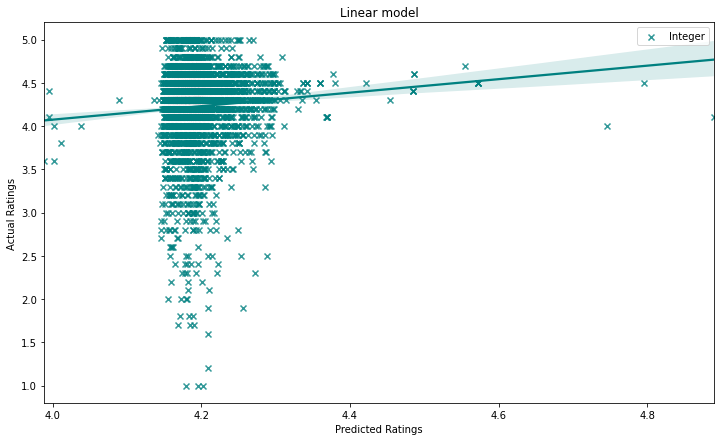

In [151]:
plt.figure(figsize=(12,7))
sns.regplot(results,y_te,color='teal', label = 'Integer', marker = 'x')
plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [152]:
print(results.mean(), results.std())

4.197443171669943 0.04429528499027755


## 2) Elipson-Support Vector Regression Model

In [153]:
from sklearn import svm
#Integer encoding

features = ['category_num', 'reviews_num', 'size_median', 'installs_num', 'price_num', 'content_rating_num']
X = data[features]
y = data.rating_median
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train,y_train)

results2 = model2.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results2, name = 'SVM - Integer'),ignore_index = True)


In [154]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.213808,0.31901,0.0101229
1,SVM - Integer,0.213297,0.293047,0.0105288


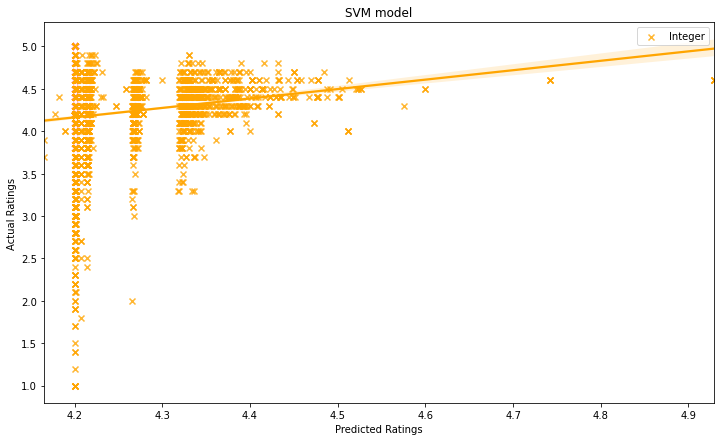

In [155]:
plt.figure(figsize=(12,7))
sns.regplot(results2,y_test,color='orange', label = 'Integer', marker = 'x')
plt.legend()
plt.title('SVM model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [156]:
print(results2.mean(), results2.std())

4.238942558016698 0.07047477802061426


## 3) Random Forest Regressor Model

In [157]:
from sklearn.ensemble import RandomForestRegressor

#Integer encoding
features = ['category_num', 'reviews_num', 'size_median', 'installs_num', 'price_num', 'content_rating_num']
X = data[features]
y = data.rating_median
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
results3 = model3.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results3, name = 'RFR - Integer'),ignore_index = True)


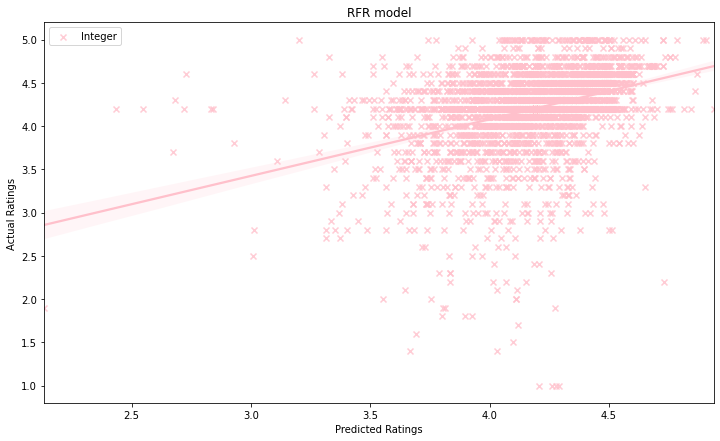

In [158]:
plt.figure(figsize=(12,7))
sns.regplot(results3,y_test,color='pink', label = 'Integer', marker = 'x')
plt.legend()
plt.title('RFR model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [159]:
print(results3.mean(), results3.std())

4.177604914865051 0.2660955064358289


In [160]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.213808,0.31901,0.0101229
1,SVM - Integer,0.213297,0.293047,0.0105288
2,RFR - Integer,0.202395,0.291056,0.00990743


# 7. Refining the Linear Regression

In [161]:
# Features selection
features = ['category_num', 'reviews_num', 'size_median', 'installs_num', 'price_num', 'content_rating_num']
X = data[features]

In [162]:
# Label selection
y = data.rating_median

In [163]:
# For testing purpose
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [164]:
train_X.shape, test_X.shape

((7588, 6), (3252, 6))

In [165]:
train_y.shape, test_y.shape

((7588,), (3252,))

### 7-1) Pipe line

#### 1. Define the pipeline

In [166]:
pipeall = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression,k='all'),
    LinearRegression()
)

#### 2. Fit the pipeline

In [167]:
pipeall.fit(train_X, train_y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x00000174FC59DAF0>)),
                ('linearregression', LinearRegression())])

### 7-2) Assess performance on train and test data

In [168]:
y_tr_pred = pipeall.predict(train_X)
y_te_pred = pipeall.predict(test_X)

In [169]:
r2_score(train_y, y_tr_pred), r2_score(test_y, y_te_pred)

(0.009618489029026067, 0.010417727263741239)

In [170]:
mean_absolute_error(train_y, y_tr_pred), mean_absolute_error(test_y, y_te_pred)

(0.3148462609984129, 0.310949269046931)

Text(0, 0.5, 'Predictions')

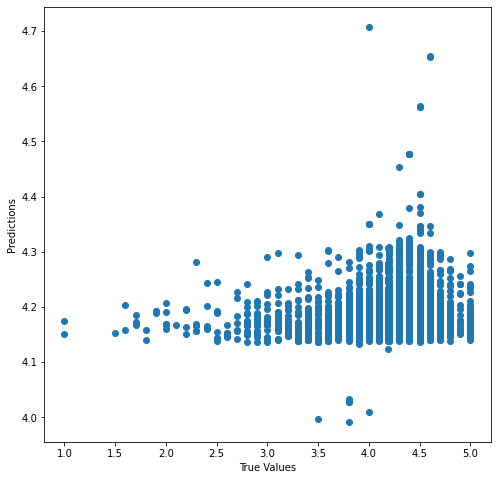

In [171]:
## The line / model
plt.scatter(test_y, y_te_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### 7-3) Cross-Validation

In [172]:
cv_results = cross_validate(pipeall, train_X, train_y, cv=5)

In [173]:
cv_results

{'fit_time': array([0.03796482, 0.02411246, 0.03462839, 0.03285909, 0.03059793]),
 'score_time': array([0.00049829, 0.01596951, 0.00883627, 0.00799632, 0.00880384]),
 'test_score': array([0.00929895, 0.00665795, 0.01110954, 0.00449818, 0.00914261])}

In [174]:
cv_scores = cv_results['test_score']
cv_scores

array([0.00929895, 0.00665795, 0.01110954, 0.00449818, 0.00914261])

In [175]:
np.mean(cv_scores), np.std(cv_scores)

(0.008141445131555947, 0.002307635551722461)

In [176]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.  , 0.01])

### 7-4) Hyperparameter search using GridSearchCV


In [178]:
pipeall.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [179]:
k = [k+1 for k in range(len(train_X.columns))]
grid_params = {'selectkbest__k': k}

In [180]:
lr_grid_cv = GridSearchCV(pipeall, param_grid=grid_params, cv=5, n_jobs=-1)

In [181]:
lr_grid_cv.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x00000174FC59DAF0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6]})

In [182]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [183]:
lr_grid_cv.best_params_

{'selectkbest__k': 2}

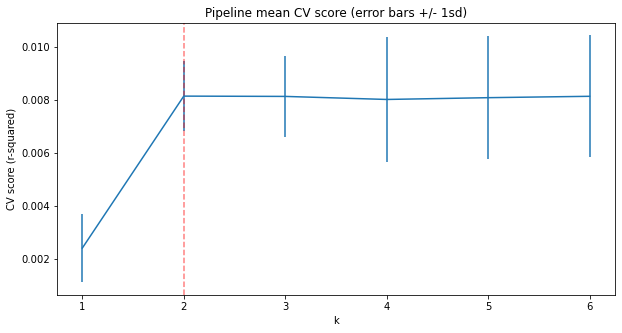

In [184]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [185]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [186]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = train_X.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

size_median    0.032755
reviews_num    0.028666
dtype: float64

# 8. Random Forest Model

In [187]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(test_X)
print(mean_absolute_error(test_y, melb_preds))

0.2853235975121606


In [188]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=50)
)

In [189]:
rf_default_cv_results = cross_validate(RF_pipe, train_X, train_y, cv=5)

In [190]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.12969805, 0.02889119, 0.08728328, 0.07844679, 0.07920221])

In [191]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.08070430492116254, 0.03204878225800274)

In [192]:
y_predicted = forest_model.predict(test_X)

#### Hyperparameter search using GridSearchCV

In [194]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [195]:
rf_grid_cv = GridSearchCV(RF_pipe, grid_params, param_grid=dict, cv=5, n_jobs=-1)

In [196]:
rf_grid_cv.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=50))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [198]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [199]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, train_X, train_y, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.13731287, 0.04745698, 0.10647398, 0.08761791, 0.08689377])

In [200]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.09315110265893053, 0.029276213389924928)

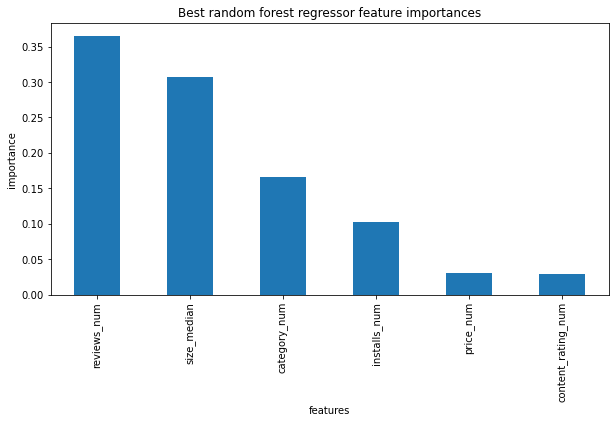

In [201]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=train_X.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

# 8. Selecting Models

#### Linear Regression Model

In [202]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, train_X, train_y, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [203]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(0.3147879956256213, 0.0071260655652883)

In [204]:
mean_absolute_error(test_y, lr_grid_cv.best_estimator_.predict(test_X))

0.31137042043558105

#### Random Forest Model

In [205]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, train_X, train_y, n_jobs=-1)

In [206]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(-0.09315110265893053, 0.029276213389924928)

In [207]:
mean_absolute_error(test_y, rf_grid_cv.best_estimator_.predict(test_X))

0.2829691508772848